In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data=pd.read_csv("bigmartsales.csv")
print(data.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [39]:
print(data['Outlet_Size'].value_counts())

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


In [40]:
print("Total no.of values : ",data['Item_Weight'].values.shape)
print("Total no.of null values : ",data["Item_Weight"].isna().sum())

Total no.of values :  (8523,)
Total no.of null values :  1463


In [41]:
from sklearn.impute import SimpleImputer
sm=SimpleImputer(missing_values=np.NaN,strategy='mean')
data["Item_Weight"]=sm.fit_transform(data["Item_Weight"].values.reshape(-1,1))
print(data["Item_Weight"].isna().sum())

0


In [42]:
a=data["Outlet_Size"].mode()
print(a[0])
data["Outlet_Size"].fillna(a[0],inplace=True)
print(data["Outlet_Size"].isna().sum())

Medium
0


In [43]:
data.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB
None


In [45]:
ab=pd.get_dummies(data)
print(ab.shape)

(8523, 36)


In [46]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(ab,test_size=0.3,random_state=0)

In [47]:
x_train=train.drop(columns=["Item_Outlet_Sales"])
y_train=train["Item_Outlet_Sales"]

x_test=test.drop(columns=["Item_Outlet_Sales"])
y_test=test["Item_Outlet_Sales"]

In [48]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler(feature_range=(0,1))
x_train=s.fit_transform(x_train)
x_train=pd.DataFrame(x_train)

x_test=s.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [50]:
print(x_test.head())

         0         1         2         3    4    5    6    7    8    9   ...  \
0  0.592141  0.291941  0.545139  0.708333  0.0  1.0  0.0  0.0  0.0  0.0  ...   
1  0.494352  0.030942  0.141357  0.000000  0.0  1.0  0.0  0.0  0.0  0.0  ...   
2  0.413516  0.057577  0.418076  0.916667  0.0  1.0  0.0  0.0  0.0  0.0  ...   
3  0.335814  0.000000  0.475249  0.916667  0.0  1.0  0.0  0.0  0.0  0.0  ...   
4  0.979160  0.159872  0.695958  0.083333  0.0  1.0  0.0  0.0  0.0  0.0  ...   

    25   26   27   28   29   30   31   32   33   34  
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
2  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  

[5 rows x 35 columns]


In [51]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [52]:
print(y_pred)

[1905.78592 1734.409   2020.17036 ... 1195.37732 4100.26272 2183.29136]


In [57]:
from sklearn.metrics import mean_squared_error as mse
msqr=[]
for i in range(1,21):
  model=KNeighborsRegressor(n_neighbors=i)
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  msqr.append(np.sqrt(mse(y_test,pred)))
for i in range(len(msqr)):
  print("SMQR of model {}: {}".format(i,msqr[i]))

SMQR of model 0: 1622.1708818144195
SMQR of model 1: 1384.7533451018614
SMQR of model 2: 1308.897812351999
SMQR of model 3: 1277.2034372637902
SMQR of model 4: 1252.4846429832314
SMQR of model 5: 1246.7697929883395
SMQR of model 6: 1244.584589127322
SMQR of model 7: 1244.3716701735505
SMQR of model 8: 1241.8771552932565
SMQR of model 9: 1242.5765849676593
SMQR of model 10: 1244.8540347538753
SMQR of model 11: 1247.8260398617656
SMQR of model 12: 1251.9796424573076
SMQR of model 13: 1258.6941413660854
SMQR of model 14: 1265.8940515697318
SMQR of model 15: 1274.216519231596
SMQR of model 16: 1278.335713396307
SMQR of model 17: 1284.3976419887258
SMQR of model 18: 1291.2461876916161
SMQR of model 19: 1296.0303328620582


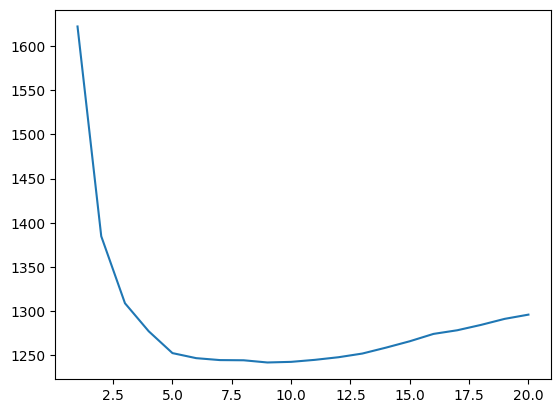

In [59]:
# curve=pd.DataFrame(msqr)
# curve.plot()
plt.plot(range(1,21),msqr)

In [77]:
dataset=pd.read_csv("bigmartsales_Test.csv")
print(dataset.isna().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [78]:
bc=dataset["Item_Weight"].mean()
dataset["Item_Weight"].fillna(bc,inplace=True)
ab=dataset["Outlet_Size"].mode()
dataset["Outlet_Size"].fillna(ab[0],inplace=True)
print(dataset.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [80]:
submission=pd.DataFrame()
submission["Item_Identifier"]=dataset["Item_Identifier"]
submission["Outlet_Identifier"]=dataset["Outlet_Identifier"]

In [81]:
dataset.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB
None


In [92]:
data1=pd.get_dummies(dataset)
print(data1.columns.shape)
print(data1.info())

(35,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_Establishment_Year        5681 non-null   int64  
 4   Item_Fat_Content_LF              5681 non-null   bool   
 5   Item_Fat_Content_Low Fat         5681 non-null   bool   
 6   Item_Fat_Content_Regular         5681 non-null   bool   
 7   Item_Fat_Content_low fat         5681 non-null   bool   
 8   Item_Fat_Content_reg             5681 non-null   bool   
 9   Item_Type_Baking Goods           5681 non-null   bool   
 10  Item_Type_Breads                 5681 non-null   bool   
 11  Item_Type_Breakfast              5681 non-null   bool   
 12  Item_Type_Cann

In [91]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler(feature_range=(0,1))

data1=scal.fit_transform(data1)
dat1=pd.DataFrame(data1)
print(dat1.head())

         0         1         2         3    4    5    6    7    8    9   ...  \
0  0.964275  0.023374  0.323413  0.583333  0.0  1.0  0.0  0.0  0.0  0.0  ...   
1  0.222983  0.118737  0.235849  0.916667  0.0  0.0  0.0  0.0  1.0  0.0  ...   
2  0.598095  0.307674  0.894140  0.541667  0.0  1.0  0.0  0.0  0.0  0.0  ...   
3  0.164335  0.047548  0.524488  0.916667  0.0  1.0  0.0  0.0  0.0  0.0  ...   
4  0.484706  0.366458  0.862069  0.000000  0.0  0.0  1.0  0.0  0.0  0.0  ...   

    25   26   27   28   29   30   31   32   33   34  
0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  

[5 rows x 35 columns]


In [84]:
pred=knr.predict(dat1)
submission["Item_Outlet_Sales"]=pred
submission.to_csv("Final.csv")

In [97]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':range(1,21)}
knn=KNeighborsRegressor()
abc=GridSearchCV(knn,params,cv=5)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'n_neighbors': 8}
